<a href="https://colab.research.google.com/github/Sarthak016/Playstore_dd/blob/main/playstore_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries for analysis of the dataset

In [2]:
#Importing required libraries for analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#using pandas library and 'read_csv' function to read playstore.csv and user reviews.csv file 
playstore=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
user_reviews=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [ ]:
#checking out top 10 rows of our dataset- playstore
playstore.head(10)

In [ ]:
playstore.tail(10)

In [ ]:
#checking number of row we have to work with
len(playstore)

10841

In [ ]:
#checking datatype of every column
playstore.dtypes

In [ ]:
playstore.columns

In [ ]:
#Now we will individually check each column to see if any cleaning is required
playstore['App'].unique()

In [ ]:
playstore['Category'].unique()

In [ ]:
playstore['Rating'].unique()

In [ ]:
playstore['Reviews'].unique()

In [ ]:
#since review is all integers  , we will convert this from object to int type
playstore['Reviews']=pd.to_numeric(playstore['Reviews'])

we saw that row 3.0m has been shifted . We will drop this row to make the data cleaner

In [8]:
#Dropping row 10472
playstore=playstore.drop(10472)

In [9]:
playstore['Reviews']=pd.to_numeric(playstore['Reviews'])

In [10]:
playstore['Reviews'].dtype

dtype('int64')

In [ ]:
playstore['Size'].unique()

In [12]:
#we replace "varies with device" size to 0 to make the int type 
playstore['Size'].replace('Varies with device' , 0)

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10836     53M
10837    3.6M
10838    9.5M
10839       0
10840     19M
Name: Size, Length: 10840, dtype: object

In [ ]:
playstore['Installs'].unique()


In [14]:
#we remove + and , to convert it into float type
playstore['Installs'] = playstore['Installs'].str.replace('+', '')

playstore['Installs'] = playstore['Installs'].str.replace(',', '')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
playstore['Installs']


In [92]:
#converting to float type
playstore['Installs']=playstore['Installs'].astype(float)

In [16]:
playstore['Type'].unique() #Find Unique Values From Type Columns

array(['Free', 'Paid', nan], dtype=object)

In [17]:
playstore[playstore.Type.isnull()] #finding NaN data row

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [18]:
playstore = playstore.drop(9148)

In [ ]:
playstore['Type'].fillna('free')

In [20]:
#Checking 'price' column 
playstore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
#removing $ to convert 'price' into float
playstore['Price'] = playstore['Price'].str.replace('$', '')

#converting to float
playstore['Price']=playstore['Price'].astype(float)

In [22]:
#converting object datatype of 'Last updated' to date time 
playstore['Last Updated']=pd.to_datetime(playstore['Last Updated'])

In [ ]:
playstore['Last Updated']

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = playstore['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = playstore.groupby('Category')['App'].count()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending=False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)
data

In [ ]:
#distribution of app ratings
# Average rating of apps
avg_app_rating = playstore.Rating.mean()
print('Average app rating = ', round(avg_app_rating,2))

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = playstore['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot(data,  layout)


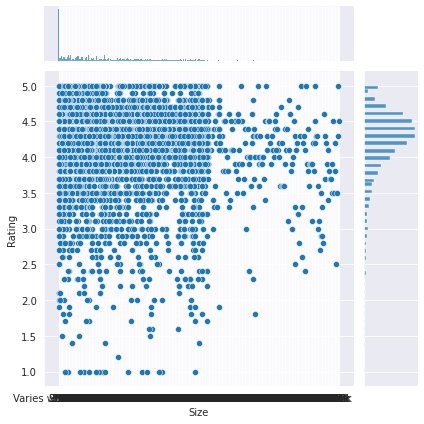

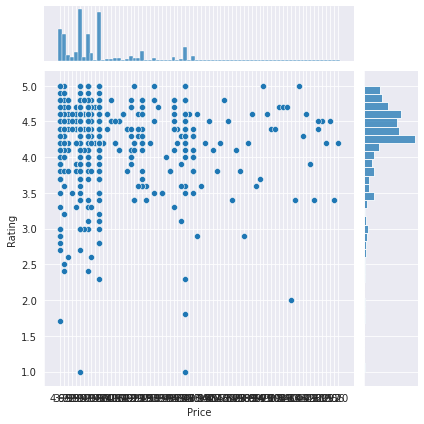

In [107]:
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = playstore.dropna(subset=['Rating', 'Size'])

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

Text(0.5, 1.0, 'App pricing trend across categories')

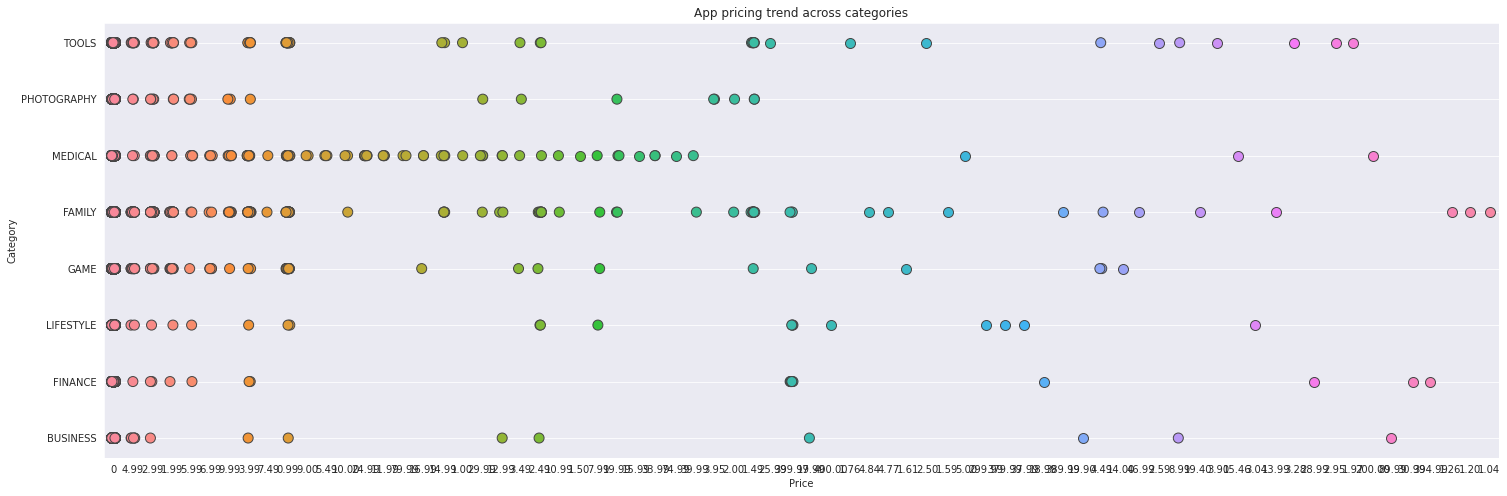

In [116]:
#popular categories vs price relation 
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)

# Select a few popular app categories
popular_app_cats = playstore[playstore.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1 , size=10)
ax.set_title('App pricing trend across categories')

